In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("../CreditCardFraudDetection/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
normal_idx = df[df.Class == 0].index
fraud_idx = df[df.Class == 1].index

df_0 = df.iloc[np.random.choice(normal_idx, 492), :]
df_1 = df.iloc[fraud_idx, :]

df_sample = pd.concat([df_0, df_1])
df_sample['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

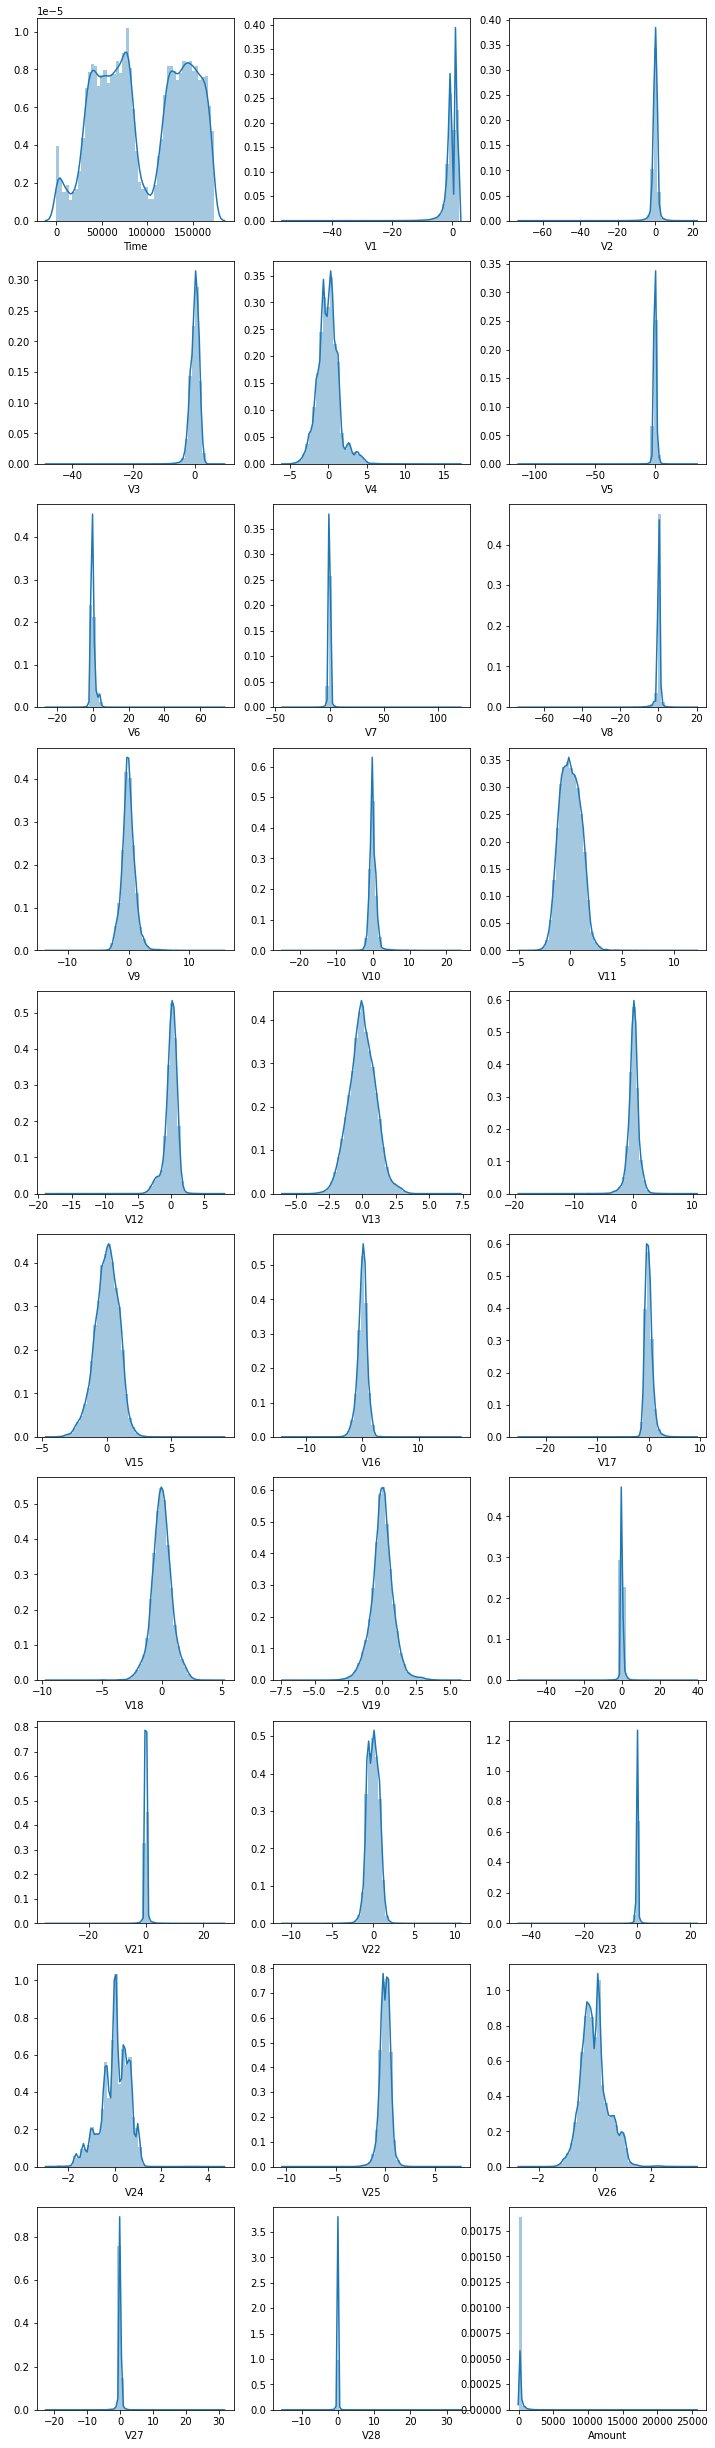

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.distplot( df["sepal_length"] , color="skyblue", label="Sepal Length")

fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(12, 44))

for i, col in enumerate(df.drop("Class", axis=1).columns):
    sns.distplot(df[col],ax=axes[i//3,i%3])


<AxesSubplot:xlabel='spearman', ylabel='feature'>

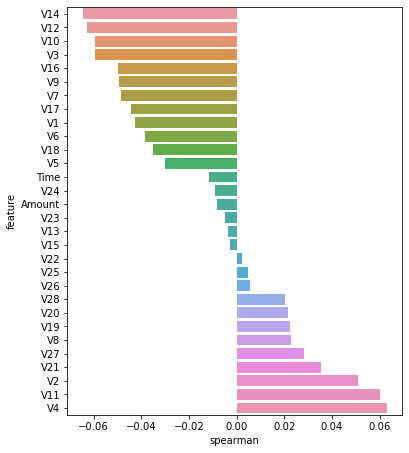

In [12]:
cols = df.drop('Class', axis=1).columns
spr = pd.DataFrame()
spr['feature'] = cols
spr['spearman'] = [df[f].corr(df['Class'], 'spearman') for f in cols]
spr = spr.sort_values('spearman')
plt.figure(figsize=(6, 0.25*len(cols)))
sns.barplot(data=spr, y='feature', x='spearman', orient='h')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sample.drop('Class', axis=1), df_sample['Class'],test_size = 0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(787, 30)
(787,)
(197, 30)
(197,)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

Cs = 